<a href="https://colab.research.google.com/github/AyoPraise750/PizzaPrice_Analysis-/blob/master/Ayoola_PraiseTask_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pizza Place Sales Analysis
An analysis of a year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price, and ingredients.

In [ ]:
import pandas as pd
# Load the datasets
order_details_df = pd.read_csv(r'/content/order_details.csv', encoding = 'latin')
orders_df = pd.read_csv(r'/content/orders.csv', encoding = 'latin')
pizzas_type_df = pd.read_csv(r'/content/pizza_types.csv', encoding = 'latin')
pizzas_df = pd.read_csv(r'/content/pizzas.csv', encoding = 'latin')
dict_df =pd.read_csv(r'/content/data_dictionary.csv', encoding = 'latin')

Joining the four CSV files to a single dataframe

In [ ]:
# the order_details contains the pizza_id and quantity for each order
df = pd.merge(order_details_df, pizzas_df, on='pizza_id')

# Merge with the pizza_types data to get type, ingredients, etc.
df = pd.merge(df, pizzas_type_df, on='pizza_type_id')

# Merge with the orders data to get date and time
df = pd.merge(df, orders_df, on='order_id')

# Convert date and time columns to datetime objects
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
df
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40


Total revenue/sales

In [ ]:
# multiply the column price and quantity to get total price
df['total_price'] = df['price'] * df['quantity']

total_revenue = df['total_price'].sum()
total_revenue
#print(f"Total Revenue: ${total_revenue:.2f}")

np.float64(817860.05)

Total quantity sold

In [ ]:
total_quantity_sold = df['quantity'].sum()
print(f"Total Pizzas Sold: {total_quantity_sold}")

Total Pizzas Sold: 49574


Number of pizza types being sold

In [ ]:
num_pizza_types = df['pizza_type_id'].nunique()
print(f"Number of Pizza Types: {num_pizza_types}")

Number of Pizza Types: 32


Average Price of the pizzas

In [ ]:
average_price = df['total_price'].mean()

print(f"Average Price of Pizzas: ${average_price:.2f}")

Average Price of Pizzas: $16.82


Five Top best-selling pizzas

In [ ]:
top_5_pizzas = df.groupby('name')['quantity'].sum().nlargest(5)
print("Top 5 Bestselling Pizzas:")
print(top_5_pizzas)

Top 5 Bestselling Pizzas:
name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


Pizza types not doing well

In [ ]:
bottom_10_pizzas = df.groupby('name')['quantity'].sum().nsmallest(10)

print("\nPizza Types not doing well (bottom 10 by quantity sold):")

print(bottom_10_pizzas)


Pizza Types not doing well (bottom 10 by quantity sold):
name
The Brie Carre Pizza            490
The Mediterranean Pizza         934
The Calabrese Pizza             937
The Spinach Supreme Pizza       950
The Soppressata Pizza           961
The Spinach Pesto Pizza         970
The Chicken Pesto Pizza         973
The Italian Vegetables Pizza    981
The Chicken Alfredo Pizza       987
The Green Garden Pizza          997
Name: quantity, dtype: int64


Peak hours of sales

In [ ]:
df['hour'] = df['time'].apply(lambda x: x.hour)

peak_hours = df['hour'].value_counts()

print("Peak hours of sales:")

print(peak_hours)

Peak hours of sales:
hour
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: count, dtype: int64


Total sales by end of the week

In [ ]:
df['day_of_week'] = df['date'].dt.day_name()
sales_by_day = df.groupby('day_of_week')['total_price'].sum().sort_values(ascending=False)
print("Total sales by day of the week:")
print(sales_by_day)

Total sales by day of the week:
day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: total_price, dtype: float64


In [ ]:
most_sales_day = sales_by_day.idxmax()
print(f"\nDay of the week with the most sales: {most_sales_day}")


Day of the week with the most sales: Friday


Sales made in each month

In [ ]:
df['month'] = df['date'].dt.to_period('M')
sales_by_month = df.groupby('month')['total_price'].sum()
print("Sales made in each month:")
print(sales_by_month)

Sales made in each month:
month
2015-01    69793.30
2015-02    65159.60
2015-03    70397.10
2015-04    68736.80
2015-05    71402.75
2015-06    68230.20
2015-07    72557.90
2015-08    68278.25
2015-09    64180.05
2015-10    64027.60
2015-11    70395.35
2015-12    64701.15
Freq: M, Name: total_price, dtype: float64


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='month'>

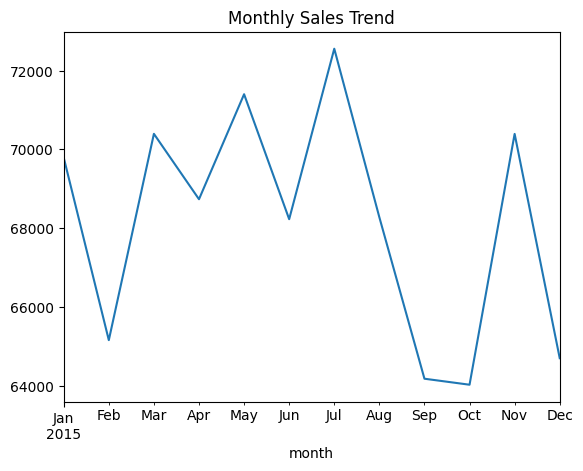

In [ ]:
sales_by_month.plot(kind='line', title='Monthly Sales Trend')

Pizzas that are not doing well on the menu

In [ ]:
#Group the DataFrame by 'name' and sum the 'quantity' for each pizza type
pizza_sales = df.groupby('name')['quantity'].sum()

# Sort the results in ascending order to find the least popular pizzas
bottom_performing_pizzas = pizza_sales.sort_values(ascending=True)

# Print the results
print("Pizza types that are not doing well (sorted by lowest quantity sold):")
print(bottom_performing_pizzas)

Pizza types that are not doing well (sorted by lowest quantity sold):
name
The Brie Carre Pizza                           490
The Mediterranean Pizza                        934
The Calabrese Pizza                            937
The Spinach Supreme Pizza                      950
The Soppressata Pizza                          961
The Spinach Pesto Pizza                        970
The Chicken Pesto Pizza                        973
The Italian Vegetables Pizza                   981
The Chicken Alfredo Pizza                      987
The Green Garden Pizza                         997
The Pepperoni, Mushroom, and Peppers Pizza    1359
The Five Cheese Pizza                         1409
The Greek Pizza                               1420
The Italian Capocollo Pizza                   1438
The Spinach and Feta Pizza                    1446
The Pepper Salami Pizza                       1446
The Prosciutto and Arugula Pizza              1457
The Napolitana Pizza                          1464
The Mex